In [9]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [10]:
# change to True to introduce market crash from covid
COVID = False

symbols = ["AAPL", "MSFT", "GOOGL", "AMZN", "META", "NVDA", "TSLA", "BRK-B", "JPM", "V", "JNJ", "WMT", "PG", "MA", "UNH"]
start_date = "2019-1-1" if COVID else "2022-01-01"
end_date = "2026-01-01"

close_prices = yf.download(symbols, start=start_date, end=end_date)['Close']
close_prices.head()

[*********************100%***********************]  15 of 15 completed


Ticker,AAPL,AMZN,BRK-B,GOOGL,JNJ,JPM,MA,META,MSFT,NVDA,PG,TSLA,UNH,V,WMT
Date,,,,,,,,,,,,,,,
2022-01-03,178.103699,170.404495,300.790009,143.904190,152.576874,144.929489,361.819153,336.191589,323.898407,30.062763,146.320877,399.926666,469.479889,214.414001,45.765411
2022-01-04,175.843246,167.522003,308.529999,143.316650,152.167694,150.423752,366.149902,334.195526,318.344421,29.233374,146.832886,383.196655,458.843079,215.411362,44.926987
2022-01-05,171.165833,164.356995,309.920013,136.741837,153.181686,147.673691,364.696564,321.921295,306.123840,27.550631,147.497574,362.706665,457.712067,213.029297,45.534447
2022-01-06,168.308502,163.253998,313.220001,136.714523,152.656921,149.242584,361.366150,330.153778,303.704956,28.123524,146.258057,354.899994,438.980682,212.787262,45.407894
2022-01-07,168.474838,162.554001,319.779999,135.989502,154.720444,150.721313,361.024292,329.488434,303.859680,27.194321,146.177185,342.320007,428.652191,210.085648,45.841347


In [11]:
log_returns = np.log(close_prices / close_prices.shift(1)).dropna()

cov_matrix = log_returns.cov()
corr_matrix = log_returns.corr()

# cholesky factor for generating correlated shocks
chol_factor = np.linalg.cholesky(cov_matrix)

# drift for geometric brownian motion
daily_variance = np.diag(cov_matrix)
mean_log_returns = log_returns.mean()
drift = mean_log_returns.values - daily_variance / 2

print('Average log daily returns:')
display(mean_log_returns)
print('Covariance matrix:')
display(cov_matrix)
print('Correlation matrix:')
display(corr_matrix)

Average log daily returns:


Ticker
AAPL     0.000421
AMZN     0.000303
BRK-B    0.000512
GOOGL    0.000776
JNJ      0.000304
JPM      0.000793
MA       0.000454
META     0.000673
MSFT     0.000400
NVDA     0.001822
PG      -0.000028
TSLA     0.000117
UNH     -0.000351
V        0.000489
WMT      0.000888
dtype: float64

Covariance matrix:


Ticker,AAPL,AMZN,BRK-B,GOOGL,JNJ,JPM,MA,META,MSFT,NVDA,PG,TSLA,UNH,V,WMT
Ticker,,,,,,,,,,,,,,,
AAPL,0.000320,0.000236,0.000097,0.000215,3.019766e-05,0.000111,0.000146,2.553017e-04,0.000189,0.000312,0.000055,0.000353,0.000049,0.000133,0.000072
AMZN,0.000236,0.000554,0.000100,0.000303,3.776358e-06,0.000145,0.000161,4.198357e-04,0.000265,0.000447,0.000026,0.000426,0.000043,0.000143,0.000084
BRK-B,0.000097,0.000100,0.000124,0.000081,4.723049e-05,0.000109,0.000096,1.000244e-04,0.000075,0.000105,0.000047,0.000124,0.000054,0.000090,0.000050
GOOGL,0.000215,0.000303,0.000081,0.000422,1.235058e-05,0.000111,0.000131,3.366218e-04,0.000219,0.000370,0.000025,0.000350,0.000044,0.000117,0.000054
JNJ,0.000030,0.000004,0.000047,0.000012,1.179764e-04,0.000037,0.000037,2.279758e-07,0.000010,-0.000042,0.000053,-0.000003,0.000050,0.000039,0.000031
JPM,0.000111,0.000145,0.000109,0.000111,3.689852e-05,0.000246,0.000118,1.449511e-04,0.000096,0.000190,0.000035,0.000213,0.000051,0.000113,0.000051
MA,0.000146,0.000161,0.000096,0.000131,3.745354e-05,0.000118,0.000208,1.797547e-04,0.000130,0.000206,0.000058,0.000191,0.000057,0.000179,0.000061
META,0.000255,0.000420,0.000100,0.000337,2.279758e-07,0.000145,0.000180,8.689920e-04,0.000296,0.000498,0.000031,0.000402,0.000012,0.000152,0.000074
MSFT,0.000189,0.000265,0.000075,0.000219,1.019076e-05,0.000096,0.000130,2.958750e-04,0.000283,0.000362,0.000038,0.000281,0.000044,0.000114,0.000058


Correlation matrix:


Ticker,AAPL,AMZN,BRK-B,GOOGL,JNJ,JPM,MA,META,MSFT,NVDA,PG,TSLA,UNH,V,WMT
Ticker,,,,,,,,,,,,,,,
AAPL,1.000000,0.561356,0.483853,0.584207,0.155364,0.395583,0.565454,0.483971,0.626463,0.518261,0.269344,0.507357,0.132460,0.531428,0.291003
AMZN,0.561356,1.000000,0.381748,0.626238,0.014776,0.391711,0.474457,0.605264,0.668911,0.563993,0.097836,0.465923,0.089120,0.432645,0.257946
BRK-B,0.483853,0.381748,1.000000,0.354144,0.389789,0.624341,0.593191,0.304160,0.396677,0.278589,0.373342,0.286791,0.236073,0.573881,0.324671
GOOGL,0.584207,0.626238,0.354144,1.000000,0.055328,0.345396,0.441374,0.555637,0.632680,0.534694,0.106241,0.438161,0.104076,0.406291,0.190522
JNJ,0.155364,0.014776,0.389789,0.055328,1.000000,0.216403,0.238807,0.000712,0.055726,-0.113616,0.434545,-0.007572,0.225296,0.253690,0.209650
JPM,0.395583,0.391711,0.624341,0.345396,0.216403,1.000000,0.519343,0.313231,0.361841,0.359624,0.195634,0.349068,0.159338,0.514264,0.234454
MA,0.565454,0.474457,0.593191,0.441374,0.238807,0.519343,1.000000,0.422303,0.533408,0.422743,0.356365,0.341209,0.193461,0.886285,0.306808
META,0.483971,0.605264,0.304160,0.555637,0.000712,0.313231,0.422303,1.000000,0.596142,0.501608,0.092413,0.351028,0.019145,0.368827,0.181918
MSFT,0.626463,0.668911,0.396677,0.632680,0.055726,0.361841,0.533408,0.596142,1.000000,0.638622,0.197273,0.429672,0.127833,0.482083,0.250186


In [12]:
# adjust simulation parameters
n_sims = 10000
n_days = 252

# adjust weights here
portfolio_config = [
    {"symbol": "AAPL", "weight": 0.3},
    {"symbol": "AMZN", "weight": 0.},
    {"symbol": "BRK-B", "weight": 0.},
    {"symbol": "GOOGL", "weight": 0.},
    {"symbol": "JNJ", "weight": 0.1},
    {"symbol": "JPM", "weight": 0.},
    {"symbol": "MA", "weight": 0.},
    {"symbol": "META", "weight": 0.},
    {"symbol": "MSFT", "weight": 0.},
    {"symbol": "NVDA", "weight": 0.4},
    {"symbol": "PG", "weight": 0.},
    {"symbol": "TSLA", "weight": 0.},
    {"symbol": "UNH", "weight": 0.},
    {"symbol": "V", "weight": 0.2},
    {"symbol": "WMT", "weight": 0.},
]

symbols = [position['symbol'] for position in portfolio_config]
weights = np.array([position['weight'] for position in portfolio_config])
selected_symbols = [symbol for symbol in portfolio_config if symbol['weight'] > 0]

portfolio_valid = True
if not np.isclose(weights.sum(), 1.0):
    print(f'Weights must sum to 1.0 (current sum: {weights.sum()})')
    portfolio_valid = False

In [13]:
sim_paths = np.zeros((n_days + 1, n_sims))
sim_paths[0, :] = 1.0

sim_port_log_returns = np.zeros((n_days, n_sims))

np.random.seed(42)
for sim_idx in range(n_sims):
    random_normals = np.random.normal(size=(n_days, len(symbols)))
    shocks = random_normals @ chol_factor.T # transpose bc shocks are correlated across columns (symbols)
    asset_log_returns = drift + shocks

    port_log_returns = asset_log_returns @ weights
    path = np.exp(port_log_returns.cumsum())

    sim_paths[1:, sim_idx] = path
    sim_port_log_returns[:, sim_idx] = port_log_returns

In [14]:
def calculate_metrics(sim_paths, sim_port_log_returns, initial_value, risk_free_rate=0.0):
    n_days, n_sims = sim_port_log_returns.shape
    years = n_days / 252

    terminal_multipliers = sim_paths[-1, :]                     # terminal growth multiplier per simulation
    terminal_values = terminal_multipliers * initial_value      # terminal portfolio value per simulation

    # convert log returns to simple returns
    sim_port_returns = np.exp(sim_port_log_returns) - 1.0

    # annual stats
    cagrs = terminal_multipliers ** (1.0 / years) - 1.0
    ann_vols = sim_port_returns.std(axis=0, ddof=1) * np.sqrt(252)
    ann_sharpes = (cagrs - risk_free_rate) / ann_vols

    # VaR
    p05_val = np.percentile(terminal_values, 5)
    p01_val = np.percentile(terminal_values, 1)
    tail_95 = terminal_values[terminal_values <= p05_val]
    var_95 = initial_value - p05_val
    var_99 = initial_value - p01_val
    cvar_95 = initial_value - tail_95.mean()

    # mdd
    running_peaks = np.maximum.accumulate(sim_paths, axis=0)
    drawdowns = (sim_paths - running_peaks) / running_peaks
    max_drawdowns = drawdowns.min(axis=0)

    metrics = {
        'median_terminal_value': np.median(terminal_values),
        'median_cagr': np.median(cagrs),
        'median_ann_vol': np.median(ann_vols),
        'median_ann_sharpe': np.median(ann_sharpes),
        'var_95': var_95,
        'var_99': var_99,
        'cvar_95': cvar_95,
        'median_mdd': np.median(max_drawdowns),
    }
    
    return metrics

In [15]:
# adjust this
initial_value = 10_000

portfolio_paths = sim_paths * initial_value
metrics = calculate_metrics(sim_paths, sim_port_log_returns, initial_value, risk_free_rate=0.00,)

Initial Value:                     $10,000.00
Portfolio Makeup:                  4 asset(s)
---------------------------------------------
 - AAPL   |   30.0%
 - JNJ    |   10.0%
 - NVDA   |   40.0%
 - V      |   20.0%
---------------------------------------------
Median Projected Value:            $11,815.46
Median CAGR:                          +18.15%
Median Annual Volatility:              29.26%
Median Sharpe Ratio:                     0.62
99% VaR:                            $3,949.41
95% VaR:                            $2,677.76
95% CVaR:                           $3,460.61
Median Max Drawdown:                  -22.74%


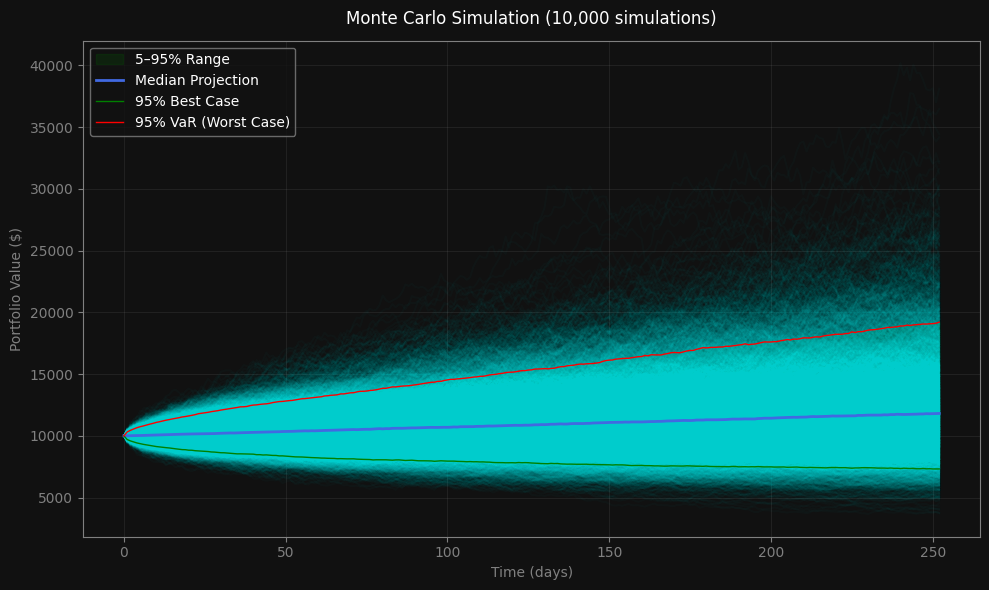

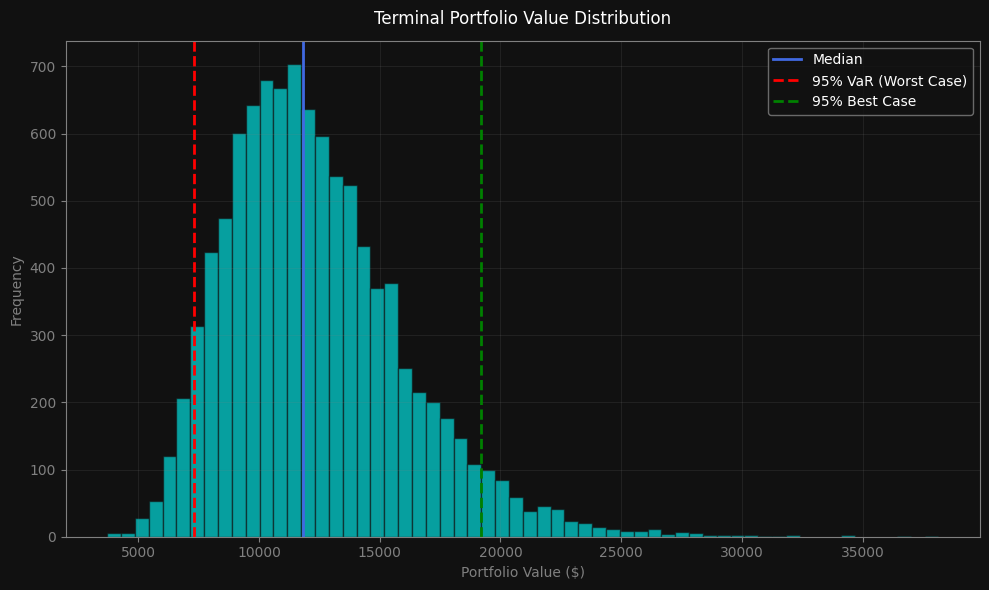

In [16]:
# format output
label_width = 28
value_width = 16
line_width = label_width + value_width + 1

print(f"{'Initial Value:':<{label_width}} {f'${initial_value:,.2f}':>{value_width}}")
print(f"{'Portfolio Makeup:':<{label_width}} {f'{len(selected_symbols)} asset(s)':>{value_width}}")
print("-" * line_width)

for symbol in selected_symbols:
    print(f" - {symbol['symbol']:<6} | {symbol['weight'] * 100:>6.1f}%")

print("-" * line_width)

print(f"{'Median Projected Value:':<{label_width}} {f'${metrics['median_terminal_value']:,.2f}':>{value_width}}")
print(f"{'Median CAGR:':<{label_width}} {f'{metrics['median_cagr'] * 100:+.2f}%':>{value_width}}")
print(f"{'Median Annual Volatility:':<{label_width}} {f'{metrics['median_ann_vol'] * 100:.2f}%':>{value_width}}")
print(f"{'Median Sharpe Ratio:':<{label_width}} {f'{metrics['median_ann_sharpe']:.2f}':>{value_width}}")
print(f"{'99% VaR:':<{label_width}} {f'${metrics['var_99']:,.2f}':>{value_width}}")
print(f"{'95% VaR:':<{label_width}} {f'${metrics['var_95']:,.2f}':>{value_width}}")
print(f"{'95% CVaR:':<{label_width}} {f'${metrics['cvar_95']:,.2f}':>{value_width}}")
print(f"{'Median Max Drawdown:':<{label_width}} {f'{metrics['median_mdd'] * 100:.2f}%':>{value_width}}")


# ------------------------------------------------
#             PLOT MONTE CARLO PATH
# ------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 6))

# Percentile bands
p05 = np.percentile(portfolio_paths, 5, axis=1)
p50 = np.percentile(portfolio_paths, 50, axis=1)
p95 = np.percentile(portfolio_paths, 95, axis=1)

# Shaded uncertainty band
ax.fill_between(
    np.arange(len(p50)),
    p05,
    p95,
    color="green",
    alpha=0.15,
    label="5–95% Range"
)

# Plot all paths (light)
ax.plot(portfolio_paths, alpha=0.02, color="cyan")

# Median path
ax.plot(p50, linewidth=2, color="royalblue", label="Median Projection")
ax.plot(p05, linewidth=1, color="green", label="95% Best Case")
ax.plot(p95, linewidth=1, color="red", label="95% VaR (Worst Case)")

# Titles + labels
ax.set_title(f"Monte Carlo Simulation ({n_sims:,} simulations)", color="white", pad=12)
ax.set_xlabel("Time (days)", color="grey")
ax.set_ylabel("Portfolio Value ($)", color="grey")

# Background styling
fig.set_facecolor("#111111")
ax.set_facecolor("#111111")

# Axis + ticks styling
ax.tick_params(colors="grey")
for spine in ax.spines.values():
    spine.set_color("grey")

# Grid
ax.grid(True, alpha=0.15, color="grey")

# Legend
legend = ax.legend(loc="upper left")
for text in legend.get_texts():
    text.set_color("white")
legend.get_frame().set_facecolor("#111111")
legend.get_frame().set_edgecolor("grey")

plt.tight_layout()
plt.show()

# ------------------------------------------------
#             PLOT HISTOGRAM
# ------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 6))

terminal_values = portfolio_paths[-1, :]

# histogram
ax.hist(
    terminal_values,
    bins=60,
    color="cyan",
    alpha=0.6,
    edgecolor="#111111"
)

median_val = np.median(terminal_values)
var95_cut = np.percentile(terminal_values, 5)
best95_cut = np.percentile(terminal_values, 95)

# reference lines
ax.axvline(median_val, color="royalblue", linewidth=2, label="Median")
ax.axvline(var95_cut, color="red", linewidth=2, linestyle="--", label="95% VaR (Worst Case)")
ax.axvline(best95_cut, color="green", linewidth=2, linestyle="--", label="95% Best Case")

# styling (match your theme)
ax.set_title("Terminal Portfolio Value Distribution", color="white", pad=12)
ax.set_xlabel("Portfolio Value ($)", color="grey")
ax.set_ylabel("Frequency", color="grey")

fig.set_facecolor("#111111")
ax.set_facecolor("#111111")

ax.tick_params(colors="grey")
for spine in ax.spines.values():
    spine.set_color("grey")

ax.grid(True, alpha=0.15, color="grey")

legend = ax.legend(loc="upper right")
for text in legend.get_texts():
    text.set_color("white")
legend.get_frame().set_facecolor("#111111")
legend.get_frame().set_edgecolor("grey")

plt.tight_layout()
plt.show()